In [1]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.17.1

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.17.1 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.17.1 which is incompatible.


In [2]:
!pip install easyocr
!pip install pyyaml
!pip install torch torchvision torchaudio
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.5 ; cuda:  cu124
detectron2: 0.6


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
CHART_TYPE_DETECTION_MODEL_PATH = "/content/drive/MyDrive/Import Folder/chartTypeDetectionModel.keras"
SCATTER_PLOT_ELEMENT_DETECTION_MODEL_PATH = "/content/drive/MyDrive/Import Folder/scatter_model_weights.pth"
IMAGE_PATH = "/content/drive/MyDrive/Import Folder/image.png"

# Detect Chart Type

In [5]:
from tensorflow.keras.saving import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def detectChartType(model_path, image_path, width=224, height=224):

    # Load and preprocess the image
    image = load_img(image_path, target_size=(width, height))

    # Add a batch dimension to the image
    image = np.expand_dims(image, axis=0)
    image = image.astype('float32') / 255.0  # Normalize

    # Load the model
    model = load_model(model_path)

    # Make predictions
    predictions = model(image, training=False)
    max_index = np.argmax(predictions)  # Get the index of the max score
    class_names = ["vbar_categorical", "hbar_categorical", "dot_line", "line"]

    return class_names[max_index]

In [6]:
chart_type = detectChartType(CHART_TYPE_DETECTION_MODEL_PATH, IMAGE_PATH)

# Detect Chart Elements for Scatter Plots



In [7]:
import torch
import detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2
import matplotlib.pyplot as plt

DATASET_NAME = "scatter_plot_elements"

MetadataCatalog.get(DATASET_NAME).thing_classes = ["title", "canvas", "x-labels",
                                                   "y-labels", "x-title", "y-title",
                                                   "legend", "scale", "other text",
                                                   "quantity"]

# Load Detectron2 configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = SCATTER_PLOT_ELEMENT_DETECTION_MODEL_PATH
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 10
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [10]:
def detectChartElements(IMAGE_PATH):
  if(detectChartType(CHART_TYPE_DETECTION_MODEL_PATH, IMAGE_PATH) != "dot_line"):
    return "Not a Scatter Plot"

  # Initialize predictor
  predictor = DefaultPredictor(cfg)

  # Load the image
  image = cv2.imread(IMAGE_PATH)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Run inference
  outputs = predictor(image)

  # Extract bounding boxes and labels
  instances = outputs["instances"].to("cpu")
  boxes = instances.pred_boxes.tensor.numpy()
  labels = instances.pred_classes.numpy()

  # Metadata for class names
  metadata = MetadataCatalog.get(DATASET_NAME)
  class_names = metadata.get("thing_classes", [])

  # Visualize the results
  v = Visualizer(image, metadata, scale=1.2)
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

  # Display the image
  plt.figure(figsize=(10, 10))
  plt.imshow(v.get_image())
  plt.axis("off")
  plt.show()

  # Dictionary to store cropped images
  detected_elements = {}

  for i, box in enumerate(boxes):
      x1, y1, x2, y2 = map(int, box)
      cropped_img = image[y1:y2, x1:x2]  # Crop bounding box

      label = class_names[labels[i]] if labels[i] < len(class_names) else f"class_{labels[i]}"

      if label not in detected_elements:
          detected_elements[label] = []

      detected_elements[label].append(cropped_img)

  return detected_elements

/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

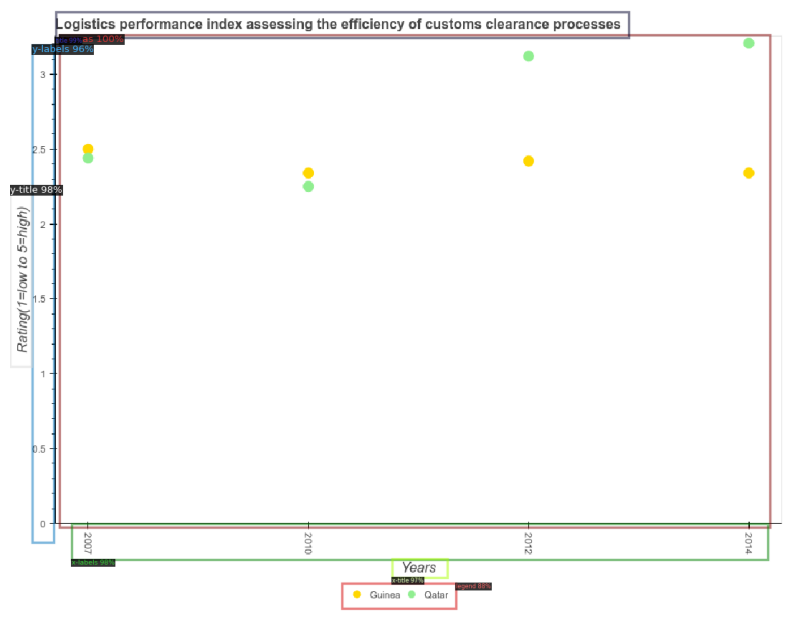

In [12]:
detectedElements = detectChartElements(IMAGE_PATH)

# Text Detection in Scatter Plots

In [13]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import os
import random
from scipy.ndimage import rotate
import numpy as np

In [23]:
reader = easyocr.Reader(['en'], gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [14]:
def is_vertical(bbox):
    """Check if a bounding box is vertical based on its height-to-width ratio."""
    (top_left, top_right, bottom_right, bottom_left) = bbox
    width = np.linalg.norm(np.array(top_right) - np.array(top_left))
    height = np.linalg.norm(np.array(top_left) - np.array(bottom_left))

    return height > width

In [15]:
def extract_and_rotate(image, bbox):
    """Extracts a bounding box region, rotates it counterclockwise, and enhances quality."""
    (top_left, top_right, bottom_right, bottom_left) = bbox
    x_min = int(min(top_left[0], bottom_left[0]))
    x_max = int(max(top_right[0], bottom_right[0]))
    y_min = int(min(top_left[1], top_right[1]))
    y_max = int(max(bottom_left[1], bottom_right[1]))

    cropped = image[y_min:y_max, x_min:x_max]

    if cropped.size == 0:
        return None  # Skip empty regions

    # Rotate the cropped text region counterclockwise
    rotated = rotate(cropped, 90, reshape=True)

    # Enhance quality before OCR
    enhanced = enhance_image(rotated)

    return enhanced

In [16]:
def enhance_image(image):
    """Enhances image quality by applying sharpening, denoising, and contrast adjustment."""
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply sharpening
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1,  5, -1],
                               [0, -1, 0]])
    sharp = cv2.filter2D(gray, -1, sharpen_kernel)

    # Apply denoising
    denoised = cv2.fastNlMeansDenoising(sharp, None, 30, 7, 21)

    # Apply contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    enhanced = clahe.apply(denoised)

    return enhanced

In [17]:
def is_text_upside_down(image):
    """Checks if text is upside down by comparing OCR confidence."""
    result_normal = reader.readtext(image)
    flipped = cv2.flip(image, -1)  # Flip upside down
    result_flipped = reader.readtext(flipped)

    # Calculate total confidence
    conf_normal = sum([conf for (_, _, conf) in result_normal])
    conf_flipped = sum([conf for (_, _, conf) in result_flipped])

    return flipped if conf_flipped > conf_normal else image  # Use flipped if confidence is better

In [18]:
def detect_text_with_confidence(image):
    """Runs OCR twice: once normally, then with numbers-only if confidence is low."""
    # First OCR pass (normal)
    results = reader.readtext(image)

    # If any detection has low confidence, re-run OCR with numbers only
    improved_results = []
    for bbox, text, prob in results:
        if prob < 0.5:  # Confidence threshold (adjust as needed)
            number_results = reader.readtext(image, allowlist="0123456789")

            # If confidence improves, use the detected number
            for num_bbox, num_text, num_prob in number_results:
                if num_prob > prob:  # If new detection has higher confidence
                    text, prob = num_text, num_prob  # Replace text with better detection

        improved_results.append((bbox, text, prob))

    return improved_results

In [46]:
def process_image(image):
    """Detects text, rotates vertical text, enhances quality, corrects upside-down text, and extracts text."""

    output_img = image.copy()  # Copy for drawing
    rotated_images = []  # Store rotated images for display

    # Step 1: Run EasyOCR
    results = detect_text_with_confidence(image)

    final_texts = []

    for bbox, text, prob in results:
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))

        if is_vertical(bbox):
            rotated = extract_and_rotate(image, bbox)

            if rotated is not None:
                # Fix upside-down text
                corrected_image = is_text_upside_down(rotated)
                rotated_images.append(corrected_image)

                # Re-run OCR on the corrected image
                rotated_result = detect_text_with_confidence(corrected_image)

                for (_, rotated_text, rotated_prob) in rotated_result:
                    final_texts.append((rotated_text, rotated_prob, "vertical"))
                    text = rotated_text  # Update with corrected text

        else:
            final_texts.append((text, prob, "horizontal"))

        # Draw bounding boxes and text
        font = cv2.FONT_HERSHEY_SIMPLEX
        output_img = cv2.rectangle(output_img, top_left, bottom_right, (0, 255, 0), 3)  # Green box
        output_img = cv2.putText(output_img, text, (top_left[0], top_left[1] - 10), font, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

    return final_texts, output_img, rotated_images

In [47]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def process_detected_elements(detected_elements):
    structured_results = {}
    detected_texts = {}

    # Process each detected element
    for label, images in detected_elements.items():
        structured_results[label] = []
        detected_texts[label] = []

        for image in images:
            text_results, annotated_img, rotated_images = process_image(image)
            annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            structured_results[label].append(annotated_img)
            detected_texts[label].append(text_results)  # Store detected text

    # Determine grid size
    num_labels = len(structured_results)
    max_columns = max(len(imgs) for imgs in structured_results.values())

    # Create subplots
    fig, axes = plt.subplots(num_labels, max_columns, figsize=(15, 3 * num_labels))

    # Ensure axes is always a 2D array
    if num_labels == 1 and max_columns == 1:
        axes = np.array([[axes]])  # Single image case
    elif num_labels == 1:
        axes = np.array([axes])  # Single row case
    elif max_columns == 1:
        axes = np.array([[ax] for ax in axes])  # Single column case

    # Plot images
    for row_idx, (label, imgs) in enumerate(structured_results.items()):
        for col_idx, img in enumerate(imgs):
            axes[row_idx, col_idx].imshow(img)
            axes[row_idx, col_idx].axis("off")
            if col_idx == 0:
                axes[row_idx, col_idx].set_title(label, fontsize=12, fontweight="bold")

        # Hide empty subplots
        for col_idx in range(len(imgs), max_columns):
            axes[row_idx, col_idx].axis("off")

    plt.tight_layout()
    plt.show()

    return detected_texts  # Return extracted text results

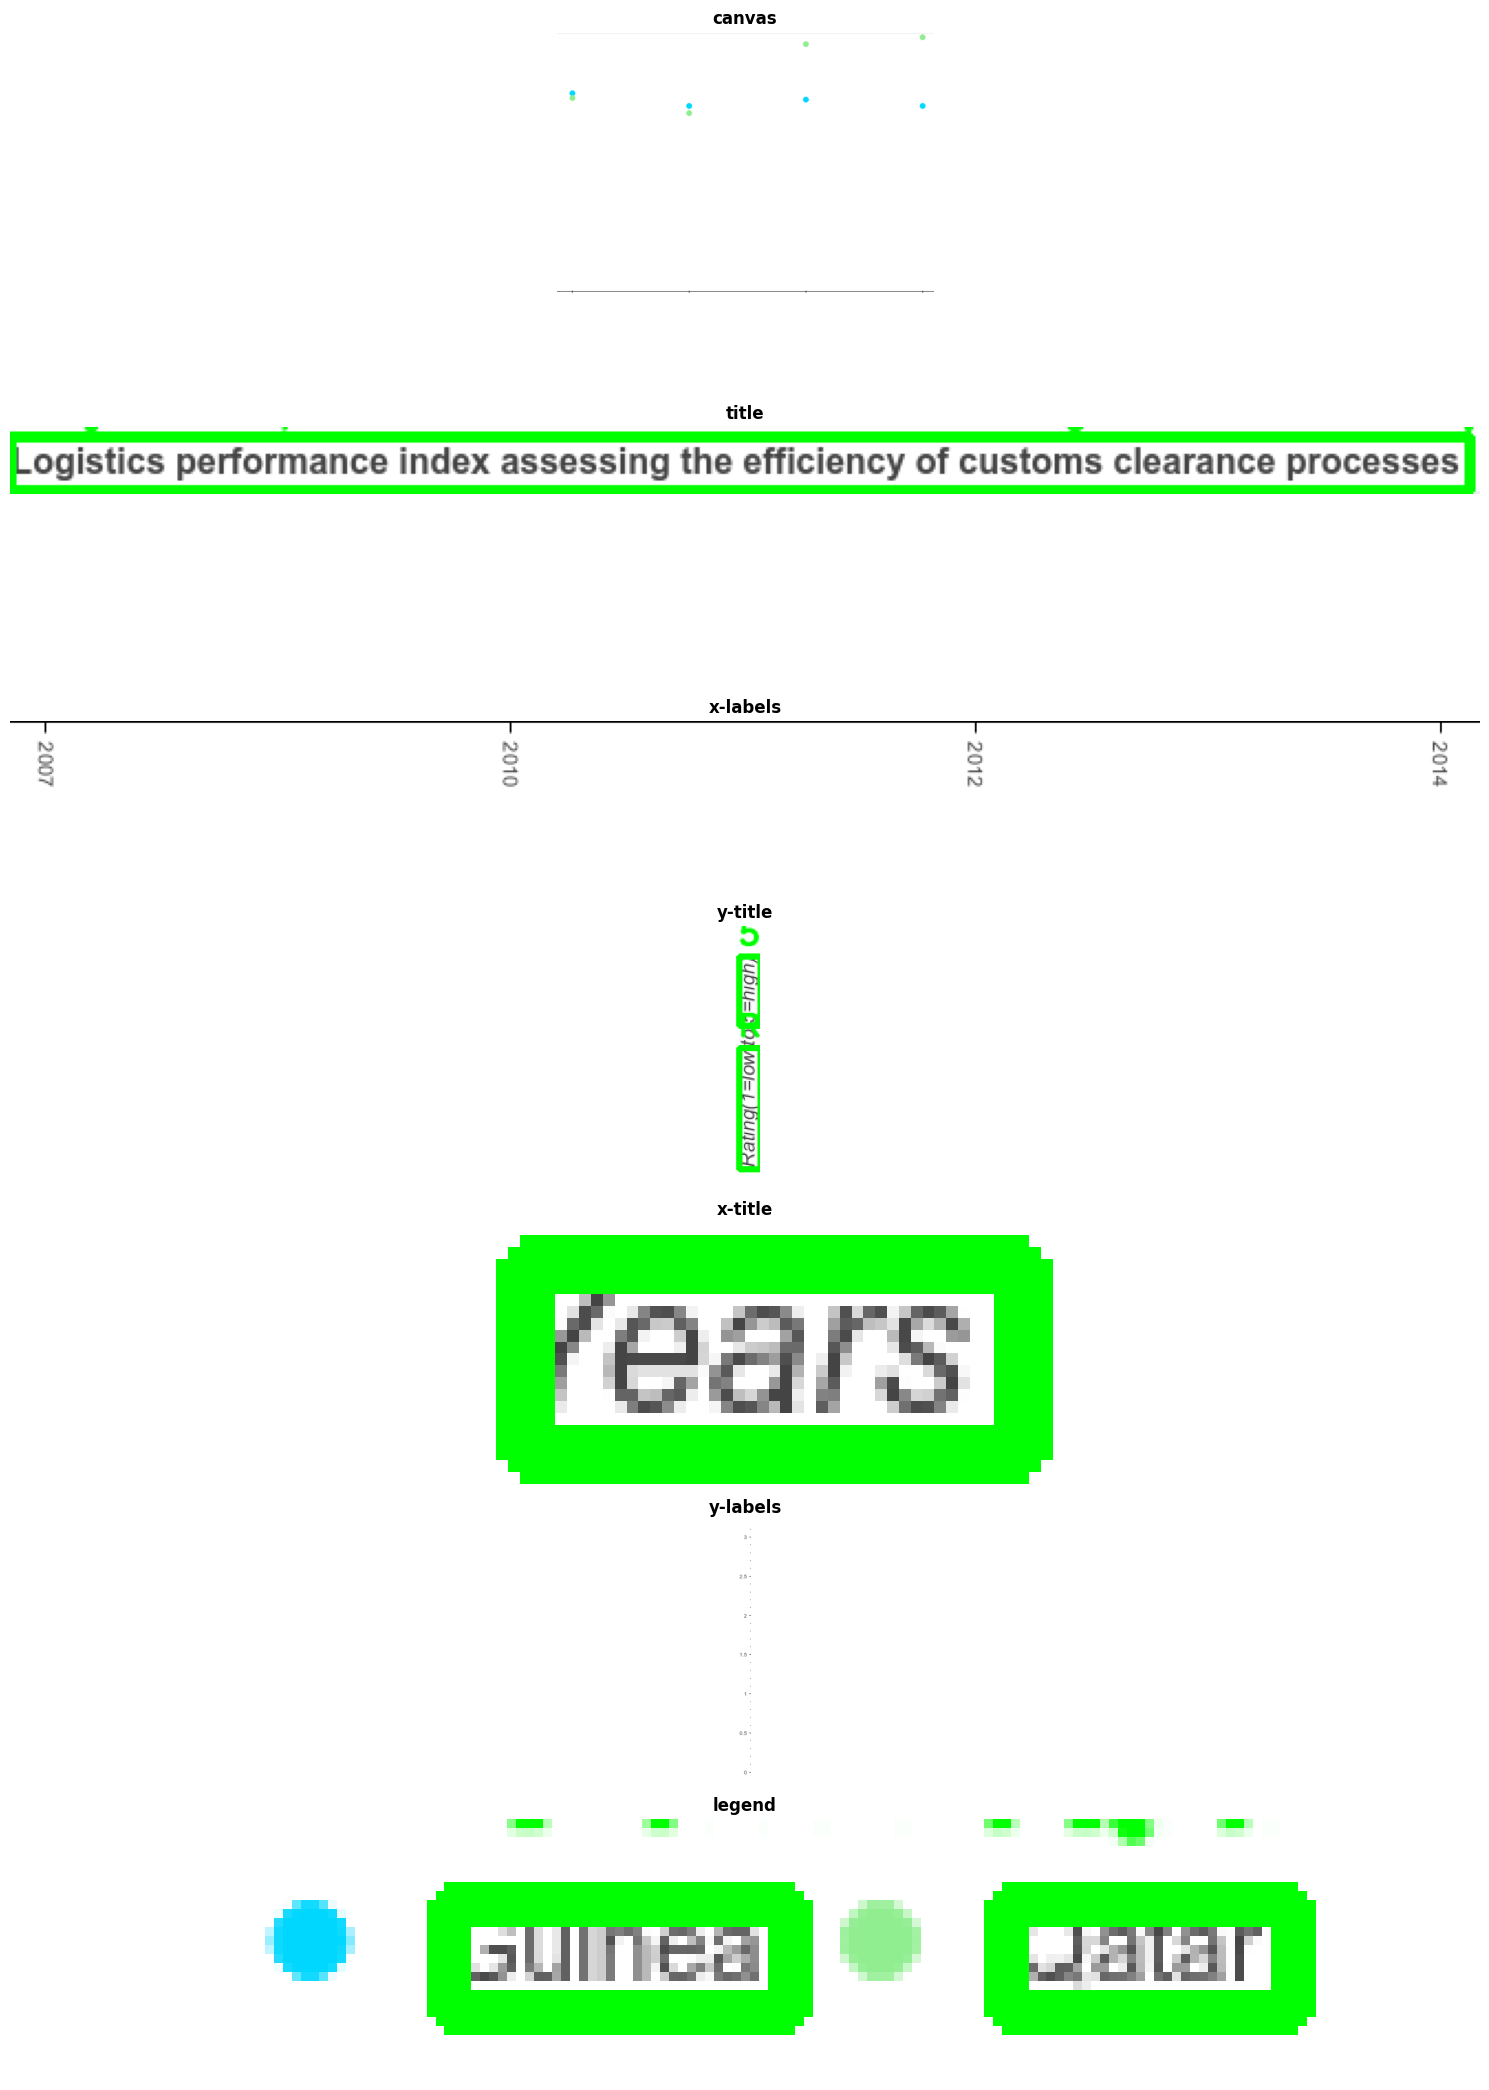

In [48]:
detected_texts = process_detected_elements(detectedElements)

In [49]:
print(detected_texts)

{'canvas': [[]], 'title': [[('Logistics performance index assessing the efficiency of customs clearance processes', 0.9550340901897862, 'horizontal')]], 'x-labels': [[]], 'y-title': [[('5-high)', 0.9049854980514863, 'vertical'), ('Rating( 1=low', 0.48369991567074394, 'vertical')]], 'x-title': [[('Years', 0.9999844328773189, 'horizontal')]], 'y-labels': [[]], 'legend': [[('Guinea', 0.9603337249195171, 'horizontal'), ('Qatar', 0.9974062396850488, 'horizontal')]]}
